# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description: 

For this analysis, we are delving into two data sets,The FBI Gun Data and U.S. Census Data. Using both of these tables will help us understand the relationship between certain census data and gun purchases.

**The FBI Gun Data** contains the following columns:

- **Month:** the month column shows the month and year related to each piece of data. 

- **State:** data in relation to the state

- **Permit:** number of permits 

- **Permit Recheck:** number of permit rechecks

- **| Handgun | Long Gun | Other | Multiple |:** all of these columns show the number of each type of gun and whether there were multiple guns recorded.

- **Admin:** number of gun admins.

- **| Prepawn Handgun | Prepawn Long Gun | Prepawn Other |:** all of these columns show the number of prepawned guns per type.

- **| Redemption Handgun | Redemption Long Gun | Redemption Other |:** all of these columns show the number of redeemed guns per type.

- **| Returned Handgun | Returned Long Gun | Returned Other |:** these columns show returned guns per type.

- **| Rentals Handgun | Rentals Long Gun |:** rental gun number per type

- **| Private Sale Handgun | Private Sale Long Gun | Private Sale Other |** number of guns corresponding to private sales per type.

- **| Return To Seller Handgun | Return To Seller Long Gun | Return To Seller Other |:** guns that were returned to seller per type.

- **Totals:** total number of guns.


**The U.S. Census Data**: the columns of this data set are composed by the states, but they will be switched out by the 'facts' which are the following.

- **Population estimates, July 1, 2016:** estimated population per state as of recorded date.

- **Population estimates base, April 1, 2010:** estimated population per state as of recorded date.

- **Population, percent change - April 1, 2010 to July 1, 2016:** change in population percentage between 2016 and 2016.  

- **Persons under 5 years, percent, July 1, 2016**

- **Persons under 5 years, percent, April 1, 2010**	

- **Persons under 18 years, percent, July 1, 2016**

- **Persons under 18 years, percent, April 1, 2010**	

- **Persons 65 years and over, percent, July 1, 2016**

- **Persons 65 years and over, percent, April 1, 2010**

- **Total accommodation and food services sales, 2012** 

- **Total health care and social assistance, 2012**	

- **Total manufacturers shipments, 2012**	

- **Total merchant wholesaler sales, 2012**	

- **Total retail sales, 2012**	

- **Total retail sales per capita, 2012**	

- **Mean travel time to work (minutes), 2012**	

- **Median household income (in 2015 dollars)** 

- **Per capita income in past 12 months** 

- **Persons in poverty, percent**

All of this data is recorded by state. 

### Question(s) for Analysis
In this analysis, I will answer the following questions:

- **1. Have gun purchases increased over the years?**

- **2. Which months, if any, see the most gun purchases?**

- **3. Which states purchase the most guns per capita and total?**

- **4. Is there a correlation between race and guns per capita?**

- **5. Is there a correlation between the percentage of people in poverty and guns per capita?**



<a id='wrangling'></a>
## Data Wrangling
> In this section, I will upload the two datasets that will be used for this analysis and take a look at their general properties to get an idea of what will need to be cleaned and modified.

In [1367]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

>**Changing display format:** since we will be dealing with large numbers, I changed the display format of floats to suppress scientific notation (*e+*).

In [1368]:
df= pd.read_csv('gun_data.csv')
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00,0.00,5734.00,6320.00,221.00,317,0.00,15.00,...,0.00,0.00,0.00,9.00,16.00,3.00,0.00,0.00,3.00,32019
1,2017-09,Alaska,209.00,2.00,2320.00,2930.00,219.00,160,0.00,5.00,...,0.00,0.00,0.00,17.00,24.00,1.00,0.00,0.00,0.00,6303
2,2017-09,Arizona,5069.00,382.00,11063.00,7946.00,920.00,631,0.00,13.00,...,0.00,0.00,0.00,38.00,12.00,2.00,0.00,0.00,0.00,28394
3,2017-09,Arkansas,2935.00,632.00,4347.00,6063.00,165.00,366,51.00,12.00,...,0.00,0.00,0.00,13.00,23.00,0.00,0.00,2.00,1.00,17747
4,2017-09,California,57839.00,0.00,37165.00,24581.00,2984.00,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,123506


In [1369]:
df.shape

(12485, 27)

In [1370]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.00,1100.00,12465.00,12466.00,5500.00,12485.00,12462.00,10542.00,10540.00,5115.00,...,1815.00,990.00,825.00,2750.00,2750.00,2750.00,2475.00,2750.00,2255.00,12485.00
mean,6413.63,1165.96,5940.88,7810.85,360.47,268.60,58.90,4.83,7.83,0.17,...,1.03,0.08,0.09,14.94,11.60,1.03,0.40,0.44,0.11,21595.73
std,23752.34,9224.20,8618.58,9309.85,1349.48,783.19,604.81,10.91,16.47,1.06,...,4.39,0.63,0.67,71.22,54.25,4.47,1.45,1.53,0.43,32591.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,865.00,2078.25,17.00,15.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4638.00
50%,518.00,0.00,3059.00,5122.00,121.00,125.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12399.00
75%,4272.00,0.00,7280.00,10380.75,354.00,301.00,0.00,5.00,8.00,0.00,...,0.00,0.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,25453.00
max,522188.00,116681.00,107224.00,108058.00,77929.00,38907.00,28083.00,164.00,269.00,49.00,...,64.00,12.00,12.00,1017.00,777.00,71.00,28.00,17.00,4.00,541978.00


In [1371]:
df.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [1372]:
df_census= pd.read_csv('census.csv').iloc[:-35] 
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> **Removed Footnotes** : The cell above uploads the dataset as well as getting rid of the footnotes at the end of it which unnecessary for my analysis. 


In [1373]:
df_census.shape

(50, 52)

In [1374]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50,12,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
unique,50,3,50,49,49,49,48,50,48,49,...,50,49,49,49,48,50,50,49,50,49
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,"5,540,545",0.10%,51.60%,...,865454,0.048,50.40%,2.50%,"625,741","8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,1,2,2,...,1,2,2,2,2,1,1,2,1,2


In [1375]:
df_census.isna().sum()

Fact               0
Fact Note         38
Alabama            0
Alaska             0
Arizona            0
Arkansas           0
California         0
Colorado           0
Connecticut        0
Delaware           0
Florida            0
Georgia            0
Hawaii             0
Idaho              0
Illinois           0
Indiana            0
Iowa               0
Kansas             0
Kentucky           0
Louisiana          0
Maine              0
Maryland           0
Massachusetts      0
Michigan           0
Minnesota          0
Mississippi        0
Missouri           0
Montana            0
Nebraska           0
Nevada             0
New Hampshire      0
New Jersey         0
New Mexico         0
New York           0
North Carolina     0
North Dakota       0
Ohio               0
Oklahoma           0
Oregon             0
Pennsylvania       0
Rhode Island       0
South Carolina     0
South Dakota       0
Tennessee          0
Texas              0
Utah               0
Vermont            0
Virginia     

In [1376]:
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


>**Modifications Needed:** As we can see, the U.S. Census will need a lot of modification and cleaning for the purposes of this analysis, starting with selecting only the facts that will be useful in relation with gun data. All of the changes needed will be explored and explained in detail in the next section of this analysis.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [1377]:
df['permit_recheck'].fillna(0.0, inplace=True)

In [1378]:
df['permit'].fillna(0.0,inplace=True)

In [1379]:
df['admin'].fillna(0.0,inplace=True)

>**NaN Values:** as we could see in the data wrangling section, there is a high count of NaN values in a lot of the columns. Depending on the columns, these values will be handled differently. 

>**Replacing with Zero:** permit_recheck, permit, and admin, all have 75th percentile of 0.0, so replacing NaN values with the mean would not be an accurate portrayal of the data, which is why the NaN values are replaced by 0.0. 

In [1380]:
df = df.fillna(df.mean())

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


>**Finding the mean:** After inspecting the columns of the dataset as well as their NaN values, I decided that the best way to handle the remainder of the NaN values was to replace them with their mean, since for the rest of the columns, the mean and the 75th percentile were quite similar. 

In [1381]:
df.isna().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

>After ensuring there are no nan-values left, we move on to straightening out datatypes.

In [1382]:
df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

>**Observing and Cleaning Data Types:** As can be seen, the month is an object instead of date, which needs to be changed to provide a more accurate analysis of the data. In addition "multiple" and "totals" will be changed from intergers to floats to make all data cohesive.  

In [1383]:
df['multiple']=df['multiple'].astype(float)
df['totals']=df['totals'].astype(float)

In [1384]:
df['month']= pd.to_datetime(df['month'])

In [1385]:
df.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                            float64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

>**Last steps:** After ensuring that all the data is clean and cohesive, it is now time to move on to the next data set.

### U.S Census:
> Now that we've finished cleaning the FBI Gun Data set, it is time to start cleaning the U.S. Census dataset.  For the purposes of this analysis, only the data that could prove useful in relation with the previous dataframe will be used. The cleaning process will be explained in detail further.

#### Drop Unnecessary Rows:
> After inspecting the U.S. Census, I took note of the facts that could prove useful for this analysis. I considered that population, age, gender, race, employment, education, income, and poverty percentage would be the facts most likely to inform the FBI Gun Data, and dropped the rest.  

In [1386]:
df_census.drop([1,2,3,4,5,9,7,6,11,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,36,37,39,40,41,42,43,44,45,46], inplace=True)
df_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
18,"Hispanic or Latino, percent, July 1, 2016, (V...",(b),4.20%,7.00%,30.90%,7.30%,38.90%,21.30%,15.70%,9.20%,...,0.037,0.052,39.10%,13.80%,1.90%,9.10%,12.40%,1.50%,6.70%,10.00%
34,"High school graduate or higher, percent of per...",NaN,84.30%,92.10%,86.00%,84.80%,81.80%,90.70%,89.90%,88.40%,...,0.909,0.855,81.90%,91.20%,91.80%,88.30%,90.40%,85.00%,91.00%,92.30%
35,"Bachelor's degree or higher, percent of person...",NaN,23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%
38,"In civilian labor force, total, percent of pop...",NaN,58.00%,67.70%,59.30%,58.50%,63.10%,67.60%,67.20%,63.10%,...,0.686,0.61,64.30%,67.70%,66.60%,64.70%,63.50%,53.90%,67.10%,67.70%


In [1387]:
df_census.drop(['Fact Note'],axis=1, inplace=True)

>**Deleting Colums:** After dropping unnecessary rows, I moved on to deleting the only column that wasn't needed in this analysis, 'Fact Note'. 

In [1388]:
df_census2=df_census.T

In [1389]:
new_header = df_census2.iloc[0] 
df_census2 = df_census2[1:] 
df_census2.columns = new_header 
df_census2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","In civilian labor force, total, percent of population age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent"
Alabama,"4,863,300",16.10%,51.60%,69.30%,26.80%,1.40%,4.20%,84.30%,23.50%,58.00%,"$43,623","$24,091",17.10%
Alaska,"741,894",10.40%,47.70%,66.10%,3.80%,6.30%,7.00%,92.10%,28.00%,67.70%,"$72,515","$33,413",9.90%
Arizona,"6,931,071",16.90%,50.30%,83.30%,4.90%,3.40%,30.90%,86.00%,27.50%,59.30%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248",16.30%,50.90%,79.40%,15.70%,1.60%,7.30%,84.80%,21.10%,58.50%,"$41,371","$22,798",17.20%
California,"39,250,017",13.60%,50.30%,72.70%,6.50%,14.80%,38.90%,81.80%,31.40%,63.10%,"$61,818","$30,318",14.30%


>**Switching Rows & Columns:** for the purposes of this analysis, it is easier for the facts to be set as columns and states as rows.

In [1390]:
new_labels=['population_2016','over_65_years','females','white_alone','black_alone','asian_alone','hispanic','highschool_higher','bachelors_25yo','labor_force_16_plus','median_household_income','income_percapita','people_in_poverty']
df_census2.columns= new_labels
df_census2.head(5)

,population_2016,over_65_years,females,white_alone,black_alone,asian_alone,hispanic,highschool_higher,bachelors_25yo,labor_force_16_plus,median_household_income,income_percapita,people_in_poverty
Alabama,"4,863,300",16.10%,51.60%,69.30%,26.80%,1.40%,4.20%,84.30%,23.50%,58.00%,"$43,623","$24,091",17.10%
Alaska,"741,894",10.40%,47.70%,66.10%,3.80%,6.30%,7.00%,92.10%,28.00%,67.70%,"$72,515","$33,413",9.90%
Arizona,"6,931,071",16.90%,50.30%,83.30%,4.90%,3.40%,30.90%,86.00%,27.50%,59.30%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248",16.30%,50.90%,79.40%,15.70%,1.60%,7.30%,84.80%,21.10%,58.50%,"$41,371","$22,798",17.20%
California,"39,250,017",13.60%,50.30%,72.70%,6.50%,14.80%,38.90%,81.80%,31.40%,63.10%,"$61,818","$30,318",14.30%


>**Column Rename:** The next step in cleaning this dataframe was to remove the indexing numbers and turning the first row into the column labels. Next, changing the names of the columns.

In [1391]:
df_census2.dtypes

population_2016            object
over_65_years              object
females                    object
white_alone                object
black_alone                object
asian_alone                object
hispanic                   object
highschool_higher          object
bachelors_25yo             object
labor_force_16_plus        object
median_household_income    object
income_percapita           object
people_in_poverty          object
dtype: object

In [1392]:
df_census2=df_census2.applymap(str)

In [1393]:
df_census2.dtypes

population_2016            object
over_65_years              object
females                    object
white_alone                object
black_alone                object
asian_alone                object
hispanic                   object
highschool_higher          object
bachelors_25yo             object
labor_force_16_plus        object
median_household_income    object
income_percapita           object
people_in_poverty          object
dtype: object

>**Turning to str:** I converted all the data to str so I could clean it more easily in the following steps.

In [1394]:
df_census2.replace(',','',regex=True,inplace=True)

In [1395]:
df_census2['population_2016'].head()

Alabama        4863300
Alaska          741894
Arizona        6931071
Arkansas       2988248
California    39250017
Name: population_2016, dtype: object

>**Removing Commas:** Before converting objects to float we need to handle the commas in the dataset. To ensure commas were removed, I printed the first 5 values of the population. As we can see, the commas were successfully removed.

In [1396]:
df_census2.replace('\$','',regex=True,inplace=True)

In [1397]:
df_census2.head()

,population_2016,over_65_years,females,white_alone,black_alone,asian_alone,hispanic,highschool_higher,bachelors_25yo,labor_force_16_plus,median_household_income,income_percapita,people_in_poverty
Alabama,4863300,16.10%,51.60%,69.30%,26.80%,1.40%,4.20%,84.30%,23.50%,58.00%,43623,24091,17.10%
Alaska,741894,10.40%,47.70%,66.10%,3.80%,6.30%,7.00%,92.10%,28.00%,67.70%,72515,33413,9.90%
Arizona,6931071,16.90%,50.30%,83.30%,4.90%,3.40%,30.90%,86.00%,27.50%,59.30%,50255,25848,16.40%
Arkansas,2988248,16.30%,50.90%,79.40%,15.70%,1.60%,7.30%,84.80%,21.10%,58.50%,41371,22798,17.20%
California,39250017,13.60%,50.30%,72.70%,6.50%,14.80%,38.90%,81.80%,31.40%,63.10%,61818,30318,14.30%


>**Dollar signs:** After removing the commas, I moved on to removing the dollar signs. The next step is removing the percetage signs (%) and converting those percentages to a float.

In [1398]:
df_census2['over_65_years']=df_census2['over_65_years'].str.rstrip("%").astype(float)/100

In [1399]:
df_census2['over_65_years'].head()

Alabama      0.16
Alaska       0.10
Arizona      0.17
Arkansas     0.16
California   0.14
Name: over_65_years, dtype: float64

>**Percentages to decimals:** To test out the code, I first converted the first column of percentages to decimals and checked for the first 5 values. Since it works, I will now move on to converting the rest of the percentages to decimals.

In [1400]:
df_census2['females']=df_census2['females'].str.rstrip("%").astype(float)/100
df_census2['white_alone']=df_census2['white_alone'].str.rstrip("%").astype(float)/100
df_census2['black_alone']=df_census2['black_alone'].str.rstrip("%").astype(float)/100
df_census2['asian_alone']=df_census2['asian_alone'].str.rstrip("%").astype(float)/100
df_census2['hispanic']=df_census2['hispanic'].str.rstrip("%").astype(float)/100
df_census2['highschool_higher']=df_census2['highschool_higher'].str.rstrip("%").astype(float)/100
df_census2['bachelors_25yo']=df_census2['bachelors_25yo'].str.rstrip("%").astype(float)/100
df_census2['labor_force_16_plus']=df_census2['labor_force_16_plus'].str.rstrip("%").astype(float)/100
df_census2['people_in_poverty']=df_census2['people_in_poverty'].str.rstrip("%").astype(float)/100

In [1401]:
df_census2.head()

,population_2016,over_65_years,females,white_alone,black_alone,asian_alone,hispanic,highschool_higher,bachelors_25yo,labor_force_16_plus,median_household_income,income_percapita,people_in_poverty
Alabama,4863300,0.16,0.52,0.69,0.27,0.01,0.04,0.84,0.23,0.58,43623,24091,0.17
Alaska,741894,0.10,0.48,0.66,0.04,0.06,0.07,0.92,0.28,0.68,72515,33413,0.10
Arizona,6931071,0.17,0.50,0.83,0.05,0.03,0.31,0.86,0.28,0.59,50255,25848,0.16
Arkansas,2988248,0.16,0.51,0.79,0.16,0.02,0.07,0.85,0.21,0.58,41371,22798,0.17
California,39250017,0.14,0.50,0.73,0.07,0.15,0.39,0.82,0.31,0.63,61818,30318,0.14


>**Changing Dtypes:** Now that all of the data has been stripped from non-numerical characters, we can proceed to turn all data into floats and then calculate the percentages.

In [1402]:
df_census2=df_census2.astype(float)

In [1403]:
df_census2['population_2016']=df_census2['population_2016'].astype(float)
df_census2['median_household_income']=df_census2['median_household_income'].astype(float)
df_census2['income_percapita']=df_census2['income_percapita'].astype(float)

In [1404]:
df_census2.dtypes

population_2016            float64
over_65_years              float64
females                    float64
white_alone                float64
black_alone                float64
asian_alone                float64
hispanic                   float64
highschool_higher          float64
bachelors_25yo             float64
labor_force_16_plus        float64
median_household_income    float64
income_percapita           float64
people_in_poverty          float64
dtype: object

### New Dataframe
> Now that we have finished cleaning up the data, it is time to create a new dataframe that included the data from 2016 of both datasets. 
**Limitations:** because the census data is confined to 2016, we will only be able to create a correlation between gun data and census for that year.

In [1406]:
pd.to_datetime(df['month'])
df_2016 = df[df['month'].dt.year == 2016]
df_2016.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,2016-12-01,Alabama,26996.00,0.00,13733.00,17519.00,376.00,533.00,0.00,10.00,...,0.00,0.00,0.00,2.00,2.00,1.00,0.00,0.00,0.00,62014.00
496,2016-12-01,Alaska,254.00,0.00,4087.00,3698.00,243.00,191.00,0.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8786.00
497,2016-12-01,Arizona,8900.00,121.00,18024.00,13785.00,1180.00,703.00,0.00,10.00,...,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,44887.00
498,2016-12-01,Arkansas,3294.00,692.00,9192.00,13433.00,277.00,385.00,37.00,4.00,...,0.00,0.00,0.00,2.00,7.00,0.00,0.00,0.00,0.00,29926.00
499,2016-12-01,California,61808.00,0.00,63649.00,93224.00,77929.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,298161.00


In [1407]:
df_2016.shape

(660, 27)

>**2016 only:** after extracting all of the gun data from 2016,  we need to add all of the values per state, so we are left with only one value per state.

In [1408]:
df_2016=df_2016.groupby('state', as_index=False).sum()

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/3035221150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2016=df_2016.groupby('state', as_index=False).sum()


In [1409]:
df_2016=df_2016.set_index('state')

In [1410]:
df_2016.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,291039.00,0.00,153123.00,121963.00,6104.00,6545.00,5.00,111.00,114.00,2.00,...,0.00,0.54,0.61,72.00,65.00,4.00,3.00,2.00,0.00,616947.00
Alaska,3121.00,0.00,37491.00,36887.00,2889.00,2316.00,0.00,84.00,70.00,0.00,...,0.00,0.54,0.61,39.00,66.00,1.00,2.00,3.00,0.00,87647.00
Arizona,87771.00,5109.00,166784.00,108988.00,13122.00,7908.00,0.00,74.00,60.00,3.00,...,1.00,0.54,0.61,76.00,56.00,11.00,11.00,11.00,1.00,416279.00
Arkansas,55456.00,7036.00,80244.00,82120.00,3059.00,4400.00,143.00,77.00,116.00,3.00,...,0.00,0.54,0.61,72.00,64.00,6.00,7.00,4.00,1.00,266014.00
California,1036981.00,0.00,560355.00,554550.00,211707.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.54,0.61,0.00,0.00,0.00,0.00,0.00,0.00,2377167.00


In [1411]:
df_2016.shape

(55, 25)

>**Joining dataframes:** Now that we have summed all values for 2016 based on state, it is time to join this new dataframe to the census data.

In [1413]:
df_all_2016= df_2016.join(df_census2)
df_all_2016.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,white_alone,black_alone,asian_alone,hispanic,highschool_higher,bachelors_25yo,labor_force_16_plus,median_household_income,income_percapita,people_in_poverty
state,,,,,,,,,,,,,,,,,,,,,
Alabama,291039.00,0.00,153123.00,121963.00,6104.00,6545.00,5.00,111.00,114.00,2.00,...,0.69,0.27,0.01,0.04,0.84,0.23,0.58,43623.00,24091.00,0.17
Alaska,3121.00,0.00,37491.00,36887.00,2889.00,2316.00,0.00,84.00,70.00,0.00,...,0.66,0.04,0.06,0.07,0.92,0.28,0.68,72515.00,33413.00,0.10
Arizona,87771.00,5109.00,166784.00,108988.00,13122.00,7908.00,0.00,74.00,60.00,3.00,...,0.83,0.05,0.03,0.31,0.86,0.28,0.59,50255.00,25848.00,0.16
Arkansas,55456.00,7036.00,80244.00,82120.00,3059.00,4400.00,143.00,77.00,116.00,3.00,...,0.79,0.16,0.02,0.07,0.85,0.21,0.58,41371.00,22798.00,0.17
California,1036981.00,0.00,560355.00,554550.00,211707.00,0.00,0.00,0.00,0.00,0.00,...,0.73,0.07,0.15,0.39,0.82,0.31,0.63,61818.00,30318.00,0.14


In [1414]:
df_all_2016['gun_percapita']=df_all_2016['totals']/df_all_2016['population_2016']

In [1415]:
df_all_2016.isnull().sum()

permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
population_2016              5
over_65_years                5
females                      5
white_alone                  5
black_alone                  5
asian_alone                  5
hispanic                     5
highscho

In [1416]:
df_all_2016=df_all_2016.dropna()

>**Ready to go!:** In the last few steps, we joined the two dataframes based on state and deleted the NaN values. Now, we are ready to start exploring the data.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




### Research Question 1:  *Have gun sales increased over the years?*
> In this section, we will explore the gun purchasing trends over the years to assess whether they have increased or not.

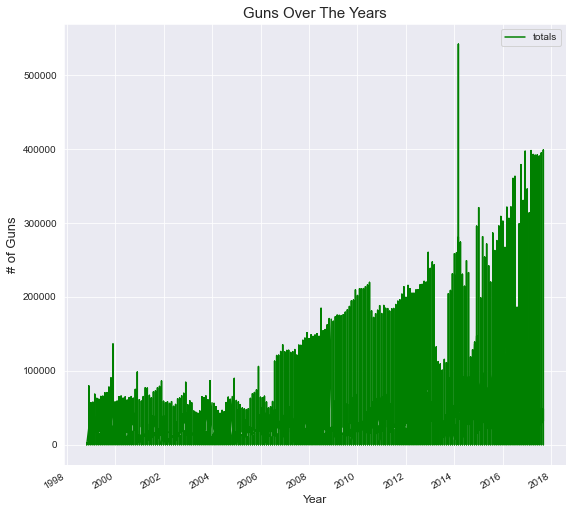

In [948]:
df.plot(x='month' ,y='totals', kind='line',color='green', figsize=(9,9))
plt.xlabel('Year', fontsize=12)
plt.ylabel('# of Guns', fontsize=13)
plt.title('Guns Over The Years',fontsize=15)
plt.grid(True)
plt.show()

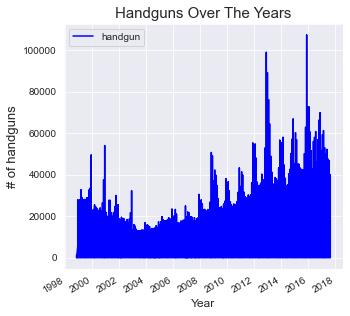

In [949]:
df.plot(x='month' ,y='handgun', kind='line',color='blue', figsize=(5,5))
plt.xlabel('Year', fontsize=12)
plt.ylabel('# of handguns', fontsize=13)
plt.title('Handguns Over The Years',fontsize=15)
plt.grid(True)
plt.show()

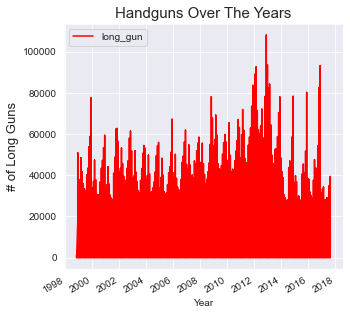

In [950]:
df.plot(x='month' ,y='long_gun', kind='line',color='red', figsize=(5,5))
plt.xlabel('Year')
plt.ylabel('# of Long Guns', fontsize=13)
plt.title('Handguns Over The Years',fontsize=15)
plt.grid(True)
plt.show()

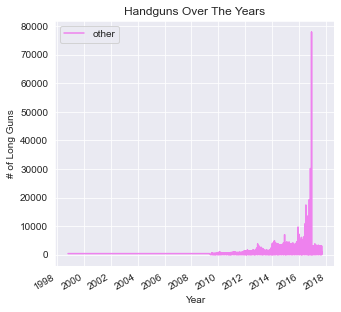

In [951]:
df.plot(x='month' ,y='other', kind='line',color='violet', figsize=(5,5))
plt.xlabel('Year')
plt.ylabel('# of Long Guns')
plt.title('Handguns Over The Years')
plt.grid(True)
plt.show()

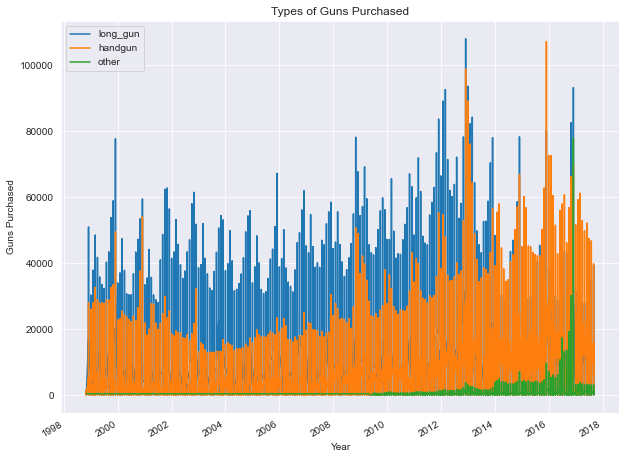

In [1420]:
df.plot(x='month', y=[ 'long_gun','handgun','other'],
        kind='line', figsize=(10,8 ))
plt.xlabel('Year')
plt.ylabel('Guns Purchased')
plt.title('Types of Guns Purchased')
plt.show()

### Answer:
> As we could see from the graphs above, gun purchasing has seen continual growth for the past few years.

>**Types of guns:** Something to note from these graphs is the trends of each type of gun. In the past, **long guns** had been the most popular, but in recent years **handguns** have taken their spot, and the rise of **other guns** between 2016-2018 is also worth taking notice of.

#### *A Deeper Look at 2015*
> As we can see, there was a tremendous surge in gun sales in 2015. In the cells below, I will be exploring 2015 gun sales in relation to states and months.

In [1011]:
pd.to_datetime(df['month'])
df_2015 = df[df['month'].dt.year == 2015]
df_2015.shape

(660, 28)

In [1012]:
df_2015_year=df_2015.groupby('state', as_index=False).sum()
df_2015.shape

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/886726708.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2015_year=df_2015.groupby('state', as_index=False).sum()


(660, 28)

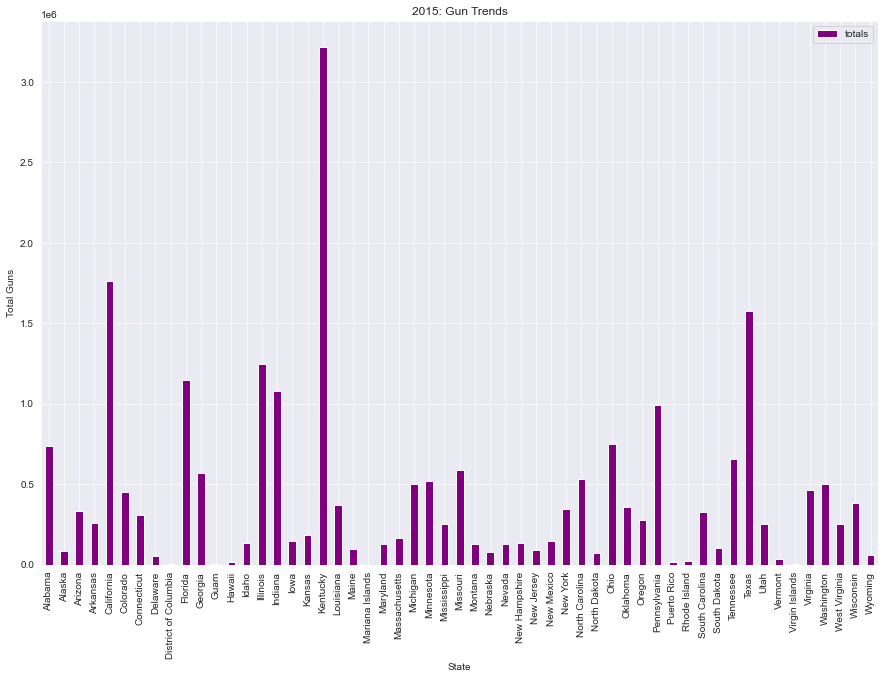

In [1131]:
df_2015_year.plot(x='state',y='totals', kind='bar',color='purple', figsize=(15,10))
plt.xlabel('State')
plt.ylabel('Total Guns')
plt.title('2015: Gun Trends')
plt.show()

>**Findings:** As we can see, the states with greatest number of purchases were *Kentucky, Califronia, Texas, Pennsylvania, Illinois, and Florida.* Later in this analysis, we will expore gun purchasing trends in relation with states, to see if 2015 is an outlier or if it follows the same trends as other years.

In [1014]:
df_2015['just_month'] = pd.DatetimeIndex(df_2015['month']).month
df_2015.head()

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/1118947539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['just_month'] = pd.DatetimeIndex(df_2015['month']).month


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,months,just_month
1155,2015-12-01,Alabama,31359.00,0.00,47605.00,33710.00,1698.00,1752.00,0.00,18.00,...,0.09,12.00,14.00,4.00,2.00,0.00,0.00,120914.00,12,12
1156,2015-12-01,Alaska,245.00,0.00,5265.00,4638.00,356.00,214.00,0.00,5.00,...,0.09,1.00,3.00,0.00,0.00,0.00,0.00,11055.00,12,12
1157,2015-12-01,Arizona,2940.00,0.00,25562.00,14725.00,1327.00,995.00,0.00,6.00,...,0.09,6.00,2.00,2.00,1.00,0.00,0.00,47759.00,12,12
1158,2015-12-01,Arkansas,4076.00,0.00,13780.00,15241.00,365.00,521.00,0.00,8.00,...,0.09,9.00,7.00,1.00,0.00,0.00,0.00,36886.00,12,12
1159,2015-12-01,California,119166.00,0.00,74399.00,48762.00,9583.00,0.00,0.00,0.00,...,0.09,0.00,0.00,0.00,0.00,0.00,0.00,252946.00,12,12


In [1015]:
df_2015_month= df_2015.groupby('just_month').sum()
df_2015_month.head()

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/4274980333.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2015_month= df_2015.groupby('just_month').sum()


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,months
just_month,,,,,,,,,,,,,,,,,,,,,
1,710792.00,0.00,543627.00,394539.00,28123.00,18209.00,396.00,169.00,204.00,37.00,...,4.22,4.80,195.00,132.00,12.00,4.00,16.00,1.00,1763233.00,55
2,567483.00,0.00,677197.00,448579.00,29014.00,25757.00,413.00,218.00,211.00,10.00,...,4.22,4.80,197.00,157.00,13.00,3.00,5.00,1.00,1848308.00,110
3,813422.00,0.00,631154.00,446107.00,27997.00,19582.00,413.00,181.00,190.00,5.00,...,4.22,4.80,268.00,293.00,81.00,4.00,16.00,5.83,2001245.00,165
4,710039.00,0.00,525804.00,361842.00,24085.00,16521.00,298.00,160.00,179.00,9.00,...,4.22,4.80,423.00,330.00,31.00,5.00,12.00,5.83,1697737.00,220
5,652186.00,0.00,500558.00,320023.00,21993.00,15791.00,282.00,163.00,183.00,4.00,...,4.22,4.80,378.00,308.00,12.00,4.00,12.00,2.00,1570893.00,275


In [1016]:
df_2015_month.reset_index(inplace=True)
df_2015_month = df_2015_month.rename(columns = {'index':'just_month'})
df_2015_month.head()

,just_month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,months
0,1,710792.00,0.00,543627.00,394539.00,28123.00,18209.00,396.00,169.00,204.00,...,4.22,4.80,195.00,132.00,12.00,4.00,16.00,1.00,1763233.00,55
1,2,567483.00,0.00,677197.00,448579.00,29014.00,25757.00,413.00,218.00,211.00,...,4.22,4.80,197.00,157.00,13.00,3.00,5.00,1.00,1848308.00,110
2,3,813422.00,0.00,631154.00,446107.00,27997.00,19582.00,413.00,181.00,190.00,...,4.22,4.80,268.00,293.00,81.00,4.00,16.00,5.83,2001245.00,165
3,4,710039.00,0.00,525804.00,361842.00,24085.00,16521.00,298.00,160.00,179.00,...,4.22,4.80,423.00,330.00,31.00,5.00,12.00,5.83,1697737.00,220
4,5,652186.00,0.00,500558.00,320023.00,21993.00,15791.00,282.00,163.00,183.00,...,4.22,4.80,378.00,308.00,12.00,4.00,12.00,2.00,1570893.00,275


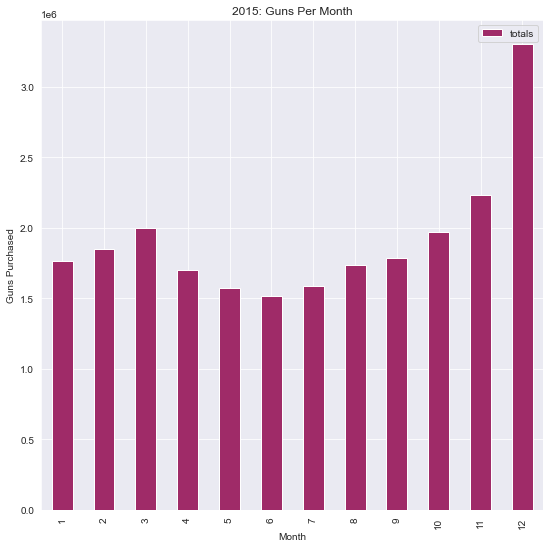

In [1018]:
df_2015_month.plot(x='just_month', y='totals', kind='bar', color='#9F2B68',
         figsize=(9, 9))
plt.xlabel('Month')
plt.ylabel('Guns Purchased')
plt.title('2015: Guns Per Month')
plt.show()



> **Findings:** As we can see, the grand majority of guns were purchased in **December of 2015.** Further in our analysis, we will be delving into a deeper exploration of the relationship between months and purchasing trends.

### Research Question 2: *Which months see the most gun purchases?*
> In this section, we will be exploring gun purchasing trends over the months.

In [964]:
df_by_months=df
df_by_months['months']= df['month'].dt.month
df_by_months.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,months
0,2017-09-01,Alabama,16717.00,0.00,5734.00,6320.00,221.00,317.00,0.00,15.00,...,0.00,0.00,9.00,16.00,3.00,0.00,0.00,3.00,32019.00,9
1,2017-09-01,Alaska,209.00,2.00,2320.00,2930.00,219.00,160.00,0.00,5.00,...,0.00,0.00,17.00,24.00,1.00,0.00,0.00,0.00,6303.00,9
2,2017-09-01,Arizona,5069.00,382.00,11063.00,7946.00,920.00,631.00,0.00,13.00,...,0.00,0.00,38.00,12.00,2.00,0.00,0.00,0.00,28394.00,9
3,2017-09-01,Arkansas,2935.00,632.00,4347.00,6063.00,165.00,366.00,51.00,12.00,...,0.00,0.00,13.00,23.00,0.00,0.00,2.00,1.00,17747.00,9
4,2017-09-01,California,57839.00,0.00,37165.00,24581.00,2984.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,123506.00,9


In [965]:
df_by_months=df_by_months.groupby('months', as_index=False).sum()

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/2813176170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_months=df_by_months.groupby('months', as_index=False).sum()


> After creating an appropriate dataframe to inspect months, it is not time to plot and explore the relationship between months and other variables.

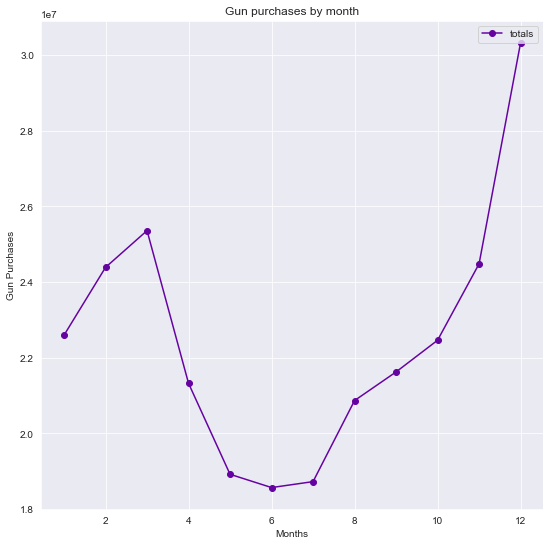

In [981]:
df_by_months.plot(x='months',y='totals', kind='line', marker='o',color='#6503A1', figsize=(9,9))
plt.xlabel('Months')
plt.ylabel('Gun Purchases')
plt.title('Gun purchases by month')
plt.show()

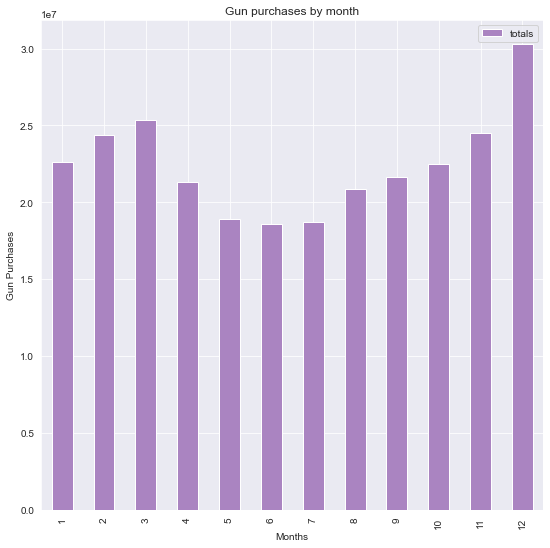

In [973]:
df_by_months.plot(x='months',y='totals', kind=('bar'), color='#AA84C1', figsize=(9,9))
plt.xlabel('Months')
plt.ylabel('Gun Purchases')
plt.title('Gun purchases by month')
plt.show()

>**Findings:** December is by far the month with most gun purchases, followed by March, November, and February. It is important to note that there is a *significant drop* in purchases between the months of May, June, and July.

### Research Question 3: *Which states have the highest purchasing records?*
> In this section we will explore the relation between states and number of gun purchases.

In [712]:
df_state= df.groupby('state').mean(numeric_only=True)
df_state.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4614.28,3.30,9788.71,11568.41,376.03,463.57,0.14,19.42,29.15,0.21,...,0.88,0.08,0.08,12.63,9.96,0.89,0.38,0.40,0.11,29542.20
Alaska,58.82,0.10,1914.55,2520.59,272.03,127.33,0.08,5.34,7.65,0.10,...,0.94,0.07,0.08,12.51,10.13,0.85,0.34,0.37,0.09,5011.64
Arizona,3130.00,29.52,7847.88,6523.18,452.03,374.36,29.26,6.96,5.22,0.18,...,0.89,0.07,0.08,12.97,9.88,0.97,0.41,0.41,0.10,19496.54
Arkansas,2237.67,59.89,4253.67,7327.12,259.18,272.77,9.45,7.80,18.81,0.15,...,0.88,0.07,0.08,12.52,9.99,0.87,0.38,0.40,0.10,16531.42
California,28768.91,0.00,26039.12,26153.17,1711.08,915.70,73.48,0.74,1.21,0.10,...,0.88,0.07,0.08,11.65,9.05,0.80,0.32,0.34,0.09,83762.39


In [715]:
df_state.reset_index(inplace=True)
df_state = df_state.rename(columns = {'index':'state'})

>**State data:** I compiled all of the data by state to make the following graphs.

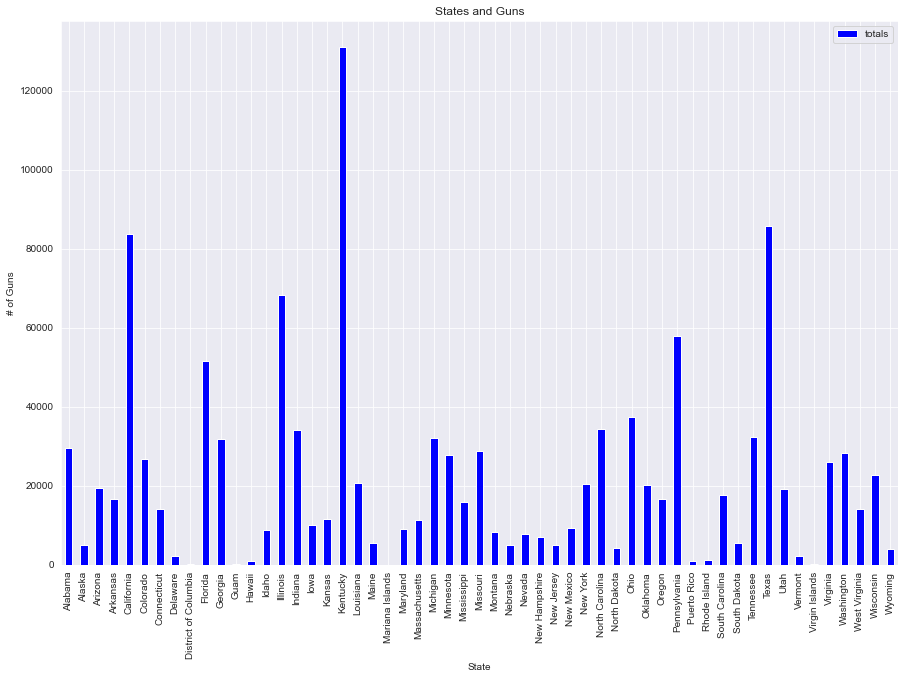

In [1129]:
df_state.plot(x= 'state' ,y='totals', kind='bar',color='blue', figsize=(15,10))
plt.xlabel('State')
plt.ylabel('# of Guns')
plt.title('States and Guns')
plt.grid(True)
plt.show()

>**Findings:** As we can see, the top gun purchasing states are Kentucky, California, Texas, Pennsylvania, and Illinois (this coincides with the trends from 2015). In the following cells, we will be exploring the percentage that each of those states take up compared to all other states in the country.

In [749]:
most_guns= df_state.query('state=="Kentucky"|state=="Texas"|state=="California"|state=="Pennsylvania"|state=="Illinois"')


In [799]:
other_states= df_state[~df_state['state'].isin(['Kentucky', 'Texas','California','Pennsylvania','Illinois'])] 
other_states['state']='other_state'
other_states.head()

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/2970379866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_states['state']='other_state'


,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,other_state,4614.28,3.30,9788.71,11568.41,376.03,463.57,0.14,19.42,29.15,...,0.88,0.08,0.08,12.63,9.96,0.89,0.38,0.40,0.11,29542.20
1,other_state,58.82,0.10,1914.55,2520.59,272.03,127.33,0.08,5.34,7.65,...,0.94,0.07,0.08,12.51,10.13,0.85,0.34,0.37,0.09,5011.64
2,other_state,3130.00,29.52,7847.88,6523.18,452.03,374.36,29.26,6.96,5.22,...,0.89,0.07,0.08,12.97,9.88,0.97,0.41,0.41,0.10,19496.54
3,other_state,2237.67,59.89,4253.67,7327.12,259.18,272.77,9.45,7.80,18.81,...,0.88,0.07,0.08,12.52,9.99,0.87,0.38,0.40,0.10,16531.42
5,other_state,1880.93,0.00,11138.42,12008.96,468.10,1351.85,12.83,0.91,1.29,...,0.97,0.07,0.08,11.65,9.05,0.80,0.32,0.34,0.09,26689.35


In [800]:
row_sum=other_states.sum(axis=0, numeric_only=True)
other_states=other_states.append(row_sum,ignore_index=True)

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/1692594514.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  other_states=other_states.append(row_sum,ignore_index=True)


In [1352]:
other_states=other_states.query('state!="other_state"')

In [1353]:
other_states['state']='others'
other_states.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
50,others,152469.98,622.17,244109.84,308448.11,16344.67,11014.59,2866.72,211.49,359.85,...,51.87,3.84,4.39,756.91,587.94,52.06,20.25,22.24,5.31,761257.91


In [806]:
most_guns=most_guns.append(other_states)

/var/folders/hf/chwln6sx2qdc_46037l3hjd40000gn/T/ipykernel_34162/584606208.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_guns=most_guns.append(other_states)


> I decided to create a pie chart to better illustrate just how big the portion that each of the **5 Top States** is in comparisons to all others. To do so, I created a new dataframe that contained the top 5 states and the sum of *all other states*.

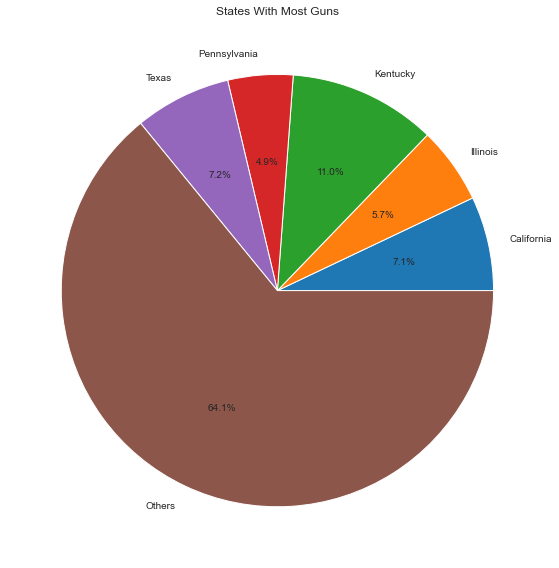

In [808]:
x=most_guns['totals']
labels = ['California', 'Illinois', 'Kentucky', 'Pennsylvania', 'Texas','Others']

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x, labels=labels,autopct='%.1f%%')
ax.set_title('States With Most Guns')
plt.tight_layout()

>**Kentucky takes the lead:** Out of all of the states in the U.S. Kentucky is by far the one with the most guns,making up for **11% of all of the guns in the country!** Followed by California, Texas, Illinois and Pennsylvania.

>**Guns Per Person:** We already looked at states based on the amount of guns they've purchased in total, but let's go a step further to see if the results are similar for guns per person in each state (in 2016).

In [1121]:
guns_pp=df_all_2016
guns_pp['guns_per_person']= df_all_2016['totals']/df_all_2016['population_2016']
guns_pp.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,black_alone,asian_alone,hispanic,highschool_higher,bachelors_25yo,labor_force_16_plus,median_household_income,income_percapita,people_in_poverty,guns_per_person
0,Alabama,291039.00,0.00,153123.00,121963.00,6104.00,6545.00,5.00,111.00,114.00,...,1303364.40,68086.20,204258.60,4099761.90,1142875.50,2820714.00,43623.00,24091.00,831624.30,0.13
1,Alaska,3121.00,0.00,37491.00,36887.00,2889.00,2316.00,0.00,84.00,70.00,...,28191.97,46739.32,51932.58,683284.37,207730.32,502262.24,72515.00,33413.00,73447.51,0.12
2,Arizona,87771.00,5109.00,166784.00,108988.00,13122.00,7908.00,0.00,74.00,60.00,...,339622.48,235656.41,2141700.94,5960721.06,1906044.53,4110125.10,50255.00,25848.00,1136695.64,0.06
3,Arkansas,55456.00,7036.00,80244.00,82120.00,3059.00,4400.00,143.00,77.00,116.00,...,469154.94,47811.97,218142.10,2534034.30,630520.33,1748125.08,41371.00,22798.00,513978.66,0.09
4,California,1036981.00,0.00,560355.00,554550.00,211707.00,0.00,0.00,0.00,0.00,...,2551251.10,5809002.52,15268256.61,32106513.91,12324505.34,24766760.73,61818.00,30318.00,5612752.43,0.06


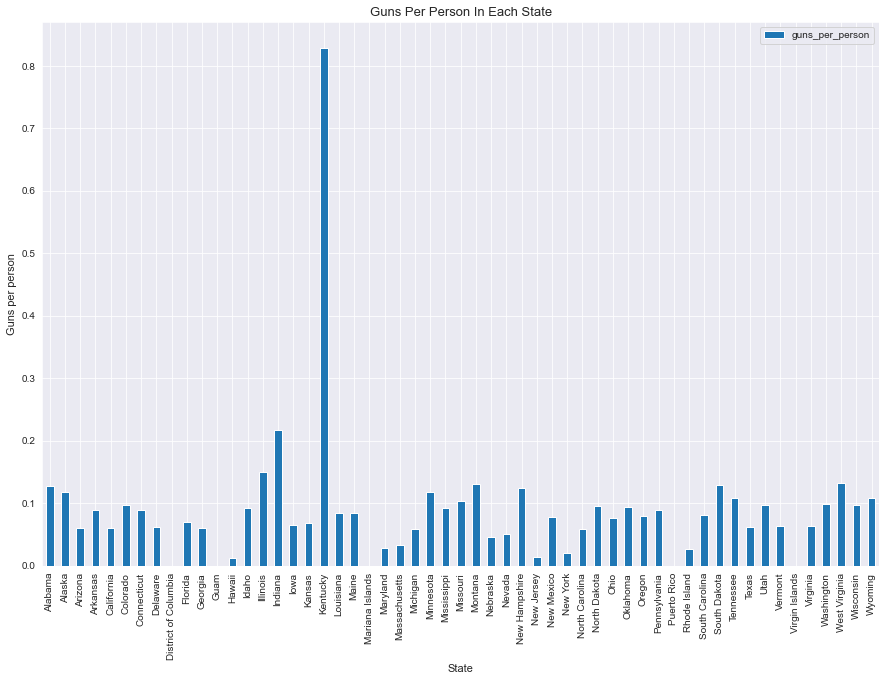

In [1354]:
guns_pp.plot(x='state',y='guns_per_person', kind='bar', figsize=(15,10))
plt.title('Guns Per Person In Each State', fontsize=13)
plt.xlabel('State', fontsize=11)
plt.ylabel('Guns per person', fontsize=11)
plt.show()

> **Findings:** Even though California was the state with the second highest purchasing rate, when calculating guns per person, it is not even in the top 5! Same goes to Texas and Pennsylvania.

### Answer:
> **Ketucky** is the state with most guns per person and in total compared to all other states. 

### Research Question 4: *Is there a correlation between race and number of guns?* (2016 Census)
> In this section, we will be exploring the relationship, if any, between level of education and total guns. This data will be confined to the year 2016.

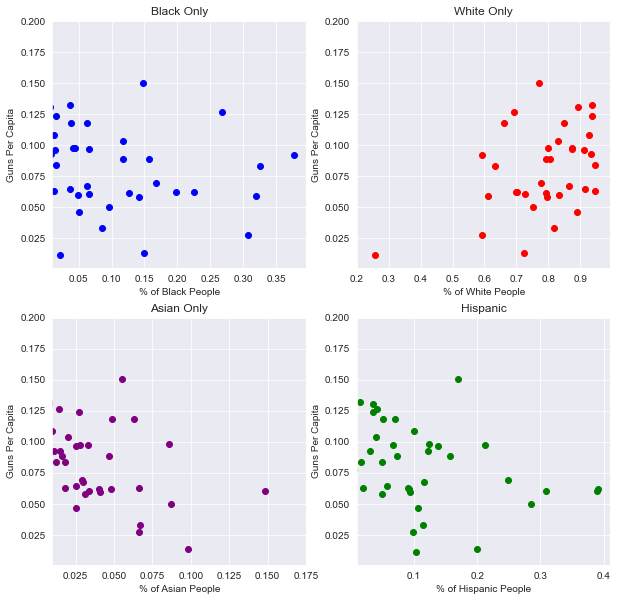

In [1528]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df_all_2016['black_alone'],df_all_2016['gun_percapita'], color='blue')
ax2.scatter( df_all_2016['white_alone'],df_all_2016['gun_percapita'], color='red')
ax3.scatter(df_all_2016['asian_alone'],df_all_2016['gun_percapita'], color='purple')
ax4.scatter(df_all_2016['hispanic'],df_all_2016['gun_percapita'], color='green')

ax1.set_title('Black Only')
ax1.set_xlabel('% of Black People')
ax1.set_ylabel('Guns Per Capita')
ax1.set_xlim(xmin=.01)
ax1.set_ylim(ymin=.001,ymax=.20)


ax2.set_title('White Only')
ax2.set_xlabel('% of White People')
ax2.set_ylabel('Guns Per Capita')
ax2.set_xlim(xmin=.2)
ax2.set_ylim(ymin=.001,ymax=.20)



ax3.set_title('Asian Only')
ax3.set_xlabel('% of Asian People')
ax3.set_ylabel('Guns Per Capita')
ax3.set_xlim(xmin=.01, xmax=.175)
ax3.set_ylim(ymin=.001,ymax=.20)



ax4.set_title('Hispanic')
ax4.set_xlabel('% of Hispanic People')
ax4.set_ylabel('Guns Per Capita')
ax4.set_xlim(xmin=.01)
ax4.set_ylim(ymin=.001,ymax=.20)



plt.show()

### Answer: 
> -**White Only**: Positive correlation. -**Black Only**: No clear correlation. -**Asian Only**: Weak negative  correlation.  -**Hispanic**: Weak negative correlation.


### Research Question 5: *Is there a correlation between people in poverty & guns per capita?*
> In this section we are going to explore the relationship between guns per capita and poverty as well as the relationship between guns per capita and median household income/income per capita.

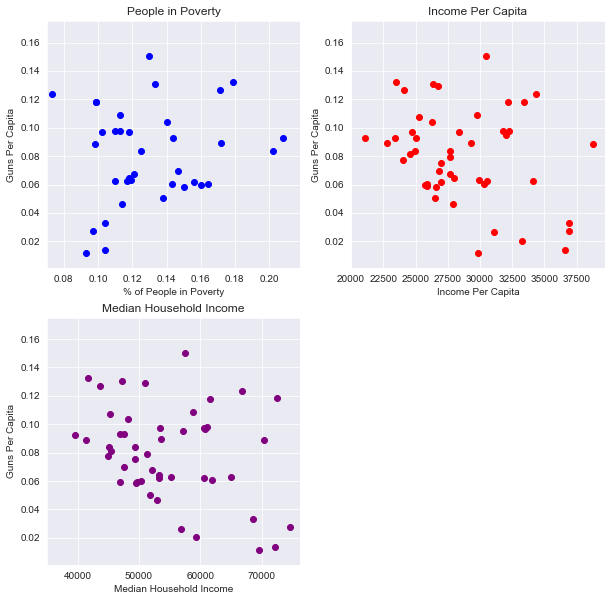

In [1523]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(df_all_2016['people_in_poverty'],df_all_2016['gun_percapita'], color='blue')
ax2.scatter( df_all_2016['income_percapita'],df_all_2016['gun_percapita'], color='red')
ax3.scatter(df_all_2016['median_household_income'],df_all_2016['gun_percapita'], color='purple')

ax1.set_title('People in Poverty')
ax1.set_xlabel('% of People in Poverty')
ax1.set_ylabel('Guns Per Capita')
ax1.set_xlim(xmin=.07)
ax1.set_ylim(ymin=.001,ymax=.175)

ax2.set_title('Income Per Capita')
ax2.set_xlabel('Income Per Capita')
ax2.set_ylabel('Guns Per Capita')
ax2.set_xlim(xmin=20000)
ax2.set_ylim(ymin=.001,ymax=.175)

ax3.set_title('Median Household Income')
ax3.set_xlabel('Median Household Income')
ax3.set_ylabel('Guns Per Capita')
ax3.set_xlim(xmin=35000)
ax3.set_ylim(ymin=.001,ymax=.175)

plt.show()

### Answer:
> There is a *weak positive correlation* between **people in poverty and guns per capita**. 

> There is a *weak negative correlations* between both **median household income/income per capita** and guns per capita.

<a id='conclusions'></a>
## Conclusions

- **1. Have gun purchases increased over the years?**
**Answer:** Yes, gun purchases have seen a steady increase throughout the years with the exception of 2015 which saw  tremendous growth in gun purchases. While the trends concerning gun purchases have remained the same over the years, the *trends for type of guns* purchased have seen an interesting change in the last couple of years.  In the past, **long guns** had been the most popular, but in recent years **handguns** have taken their spot, and the rise of **other guns** between 2016-2018 is also worth taking notice of. *Additional research* would be useful to understand why this change is happening. 


- **2. Which months, if any, see the most gun purchases?**
**Answer:** December is by far the month with most gun purchases, followed by March, November, and February. It is important to note that there is a *significant drop* in purchases between the months of May, June, and July.


- **3. Which states purchase the most guns per capita and total?**
**Answer:** The state with most overall gun purchases and guns per capita is **Kentucky**, making up for 11% of all guns in the country. In regards to total guns, Kentucky is followed by: California, Texas, Pennsylvania, and Illinois.
However, when it comes to *guns per capita*, Kentucky is followed: Indiana, Illinois, South Dakota, West Virginia, Montana, and Alabama.


- **4. Is there a correlation between race and guns per capita?**
**Answer:** The percentage of *White only* people in a state appears to have a positive correlation to the number of guns per capita. The percentage of *Black only* people in a state seems to have no clear correlation to the number of guns per capita. On the other hand, both *Asian only* and *Hispanic* percentages appear to have a weak negative correlation to the number of guns per capita. 

*Limitations:* Since the data from the Census used only included data from 2016, these findings are confined to 2016 only.


- **5. Is there a correlation between the percentage of people in poverty and guns per capita?**
**Answer:** There appears to be a weak positive correlation between percentage of people in poverty and guns per capita. In addition, both median household income and income per capita have a weak negative correlation to guns per capita.

*Limitations:* Again, the data used to understand the relationship between this census data and gun data is confined to 2016. Additional research could be made to understand whether these trends have been consistent throughout the years with the use Census data from previous years.

#### More Limitations:
- **NaN Values:** The FBI Gun Data contained a great number of NaN values, all of which were replaced in this analysis with either the mean of the column or the 75th percentile. However, the great amount of NaN values is a limitation for the study since it prevents us from creating clear and concise correlations between values, considering that for some columns most of the values were NaN.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])